WE should use percision score since we care about mostly identifying who has pneumonia

# Preparation

In [159]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
keras.__version__

'2.3.1'

In [160]:
pneumonia_images = []
healthy_images = []
import os
import struct
import numpy as np
import glob
import cv2
images = glob.glob("chest_xray/test/NORMAL/*")
for image in images:
    im = cv2.imread(image,0)
    im = cv2.resize(im,(200,200))
    im = im.flatten()/255 -.5
    healthy_images.append(im)
images = glob.glob("chest_xray/test/PNEUMONIA/*")
for image in images:
    im = cv2.imread(image,0)
    im = cv2.resize(im,(200,200))
    im = im.flatten()/255 -.5
    pneumonia_images.append(im)


In [161]:
#Now lets put them together with y values
healthy_images
b = np.zeros((len(healthy_images),1))
a = np.ones((len(pneumonia_images),1))
healthy_images = np.hstack((healthy_images, b))
pneumonia_images = np.hstack((pneumonia_images, a))
images = np.vstack([healthy_images, pneumonia_images])

In [162]:
y = images[:,-1]
X = images[:,:-1]

# folding below
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
img_wh = 200
y_test_ohe = keras.utils.to_categorical(y_test, 2)
y_train_ohe = keras.utils.to_categorical(y_train, 2)
X_train_img = np.expand_dims(X_train.reshape((-1,img_wh,img_wh)), axis=3)
X_test_img = np.expand_dims(X_test.reshape((-1,img_wh,img_wh)), axis=3)
folds = StratifiedKFold(n_splits=5,random_state=1).split(X_train, y_train)

In [5]:
y_train_ohe

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

# Modeling

In [6]:
y_test

array([1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1.])

In [163]:

#this is expansion on the dataset. This is a slower way to do it. When we use a keras generator we call .fit on a python generator
#this will yield batches

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False, #do we want to make it 0 mean
    featurewise_std_normalization=False, #do we take the whole batch and make it 0 mean, no
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations. Randomly rotate images 5 degrees 
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts. 
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False, 
    rescale=None) #this generator will esentially run forever. This will manipulate our data, will give us different datasets every time


In [177]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
#Instantiate an empty model
#get a bigger dataset
mlp_model = Sequential()
mlp_model.add(Dense(100, input_shape=(200,200,1)))
mlp_model.add(Activation('relu'))

mlp_model.add(Dropout(0.25))
mlp_model.add(Dense(32))
mlp_model.add(Activation('relu'))
# Add Dropout
mlp_model.add(Dropout(0.25))

# Output Layer
mlp_model.add(Flatten())
mlp_model.add(Dense(2))
mlp_model.add(Activation('softmax'))
mlp_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 200, 200, 100)     200       
_________________________________________________________________
activation_70 (Activation)   (None, 200, 200, 100)     0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 200, 200, 100)     0         
_________________________________________________________________
dense_56 (Dense)             (None, 200, 200, 32)      3232      
_________________________________________________________________
activation_71 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 200, 200, 32)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280000)         

In [178]:
scores = []
from keras.callbacks import CSVLogger
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#csv_logger = CSVLogger('alexNet_log.csv', append=True, separator=';')
mlp_histories= []
mlp_y_preds = []
mlp_fprs = []
mlp_tprs = []
mlp_aucs = []
mlp_thresholds = []
#datagen.fit(X_train)
for k, (train, test) in enumerate(folds):
    mlp_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=[keras.metrics.Recall()])
    print("new fold")
    datagen.fit(X_train_img)
    histories.append(mlp_model.fit_generator(datagen.flow(X_train_img[train], y_train_ohe[train], batch_size=32),
             steps_per_epoch=30,
             epochs=10, verbose=1,
             validation_data=(X_test_img,y_test_ohe)
             #callbacks=[EarlyStopping(monitor='val_loss', patience=2)]# no early stopping to allow for roc curve avg. across folds
             ))
    y_pred_keras = mlp_model.predict(X_test_img).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_ohe.ravel(), y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    mlp_aucs.append(auc_keras)
    mlp_fprs.append(fpr_keras)
    mlp_y_preds.append(y_pred_keras)
    mlp_tprs.append(tpr_keras)
    mlp_thresholds.append(thresholds_keras)


new fold
Epoch 1/10
 3/30 [==>...........................] - ETA: 6:35 - loss: 5.3378 - recall_16: 0.5625

KeyboardInterrupt: 

In [123]:

np.random.seed(1000)
#Instantiate an empty model
#get a bigger dataset
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(200,200,1), kernel_size=(14,14),  padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(7,7), strides=(1,1), padding='valid', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', data_format="channels_last"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid',kernel_initializer='he_uniform',  data_format="channels_last"))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', data_format="channels_last"))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', data_format="channels_last"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 187, 187, 32)      6304      
_________________________________________________________________
activation_19 (Activation)   (None, 187, 187, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 93, 93, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 87, 87, 64)        100416    
_________________________________________________________________
activation_20 (Activation)   (None, 87, 87, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 41, 128)      

In [125]:
scores = []
from keras.callbacks import CSVLogger
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
csv_logger = CSVLogger('alexNet_log.csv', append=True, separator=';')
histories= []
y_preds = []
fprs = []
tprs = []
aucs = []
thresholds = []
#datagen.fit(X_train)
print(folds)
for k, (train, test) in enumerate(folds):
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=[keras.metrics.Recall()])
    print("new fold")
    datagen.fit(X_train_img)
    histories.append(model.fit_generator(datagen.flow(X_train_img[train], y_train_ohe[train], batch_size=32),
             steps_per_epoch=30,
             epochs=10, verbose=1,
             validation_data=(X_test_img,y_test_ohe)
             callbacks=[EarlyStopping(monitor='val_loss', patience=2)] no early stopping to allow for roc curve avg. across folds
             ))
    y_pred_keras = model.predict(X_test_img).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_ohe.ravel(), y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    aucs.append(auc_keras)
    fprs.append(fpr_keras)
    y_preds.append(y_pred_keras)
    tprs.append(tpr_keras)
    mlp_thresholds.append(thresholds_keras)


<generator object _BaseKFold.split at 0x1c4825d8b8>
new fold
Epoch 1/10
30/30 [==============================] - 496s 17s/step - loss: 0.6928 - recall_8: 0.6095 - val_loss: 0.6153 - val_recall_8: 0.6560
Epoch 2/10
30/30 [==============================] - 513s 17s/step - loss: 0.6131 - recall_8: 0.6596 - val_loss: 0.4807 - val_recall_8: 0.7200
Epoch 3/10
30/30 [==============================] - 511s 17s/step - loss: 0.5116 - recall_8: 0.7514 - val_loss: 0.4125 - val_recall_8: 0.8320
Epoch 4/10
30/30 [==============================] - 520s 17s/step - loss: 0.4526 - recall_8: 0.7808 - val_loss: 0.3955 - val_recall_8: 0.8080
Epoch 5/10
30/30 [==============================] - 522s 17s/step - loss: 0.4173 - recall_8: 0.8042 - val_loss: 0.3118 - val_recall_8: 0.8640
Epoch 6/10
30/30 [==============================] - 516s 17s/step - loss: 0.3353 - recall_8: 0.8596 - val_loss: 0.3333 - val_recall_8: 0.8400
Epoch 7/10
30/30 [==============================] - 520s 17s/step - loss: 0.3595 - reca

In [101]:
y_pred_keras = model.predict(X_test_img)
y_pred_keras

array([[0.46905583, 0.53094417],
       [0.4687977 , 0.5312023 ],
       [0.469013  , 0.5309871 ],
       [0.46885034, 0.53114974],
       [0.46880445, 0.5311956 ],
       [0.46898493, 0.5310151 ],
       [0.46896693, 0.5310331 ],
       [0.4689211 , 0.531079  ],
       [0.46838337, 0.53161657],
       [0.46904942, 0.5309506 ],
       [0.46890095, 0.5310991 ],
       [0.46905193, 0.53094804],
       [0.4690436 , 0.5309563 ],
       [0.46896902, 0.53103095],
       [0.46904603, 0.530954  ],
       [0.46898943, 0.53101057],
       [0.469058  , 0.530942  ],
       [0.469044  , 0.5309559 ],
       [0.46895677, 0.5310432 ],
       [0.46903703, 0.53096294],
       [0.46903488, 0.53096515],
       [0.46905404, 0.5309459 ],
       [0.4689777 , 0.5310223 ],
       [0.46904337, 0.5309566 ],
       [0.4690248 , 0.5309752 ],
       [0.46888784, 0.5311122 ],
       [0.46897668, 0.5310233 ],
       [0.46892962, 0.5310704 ],
       [0.46893668, 0.5310633 ],
       [0.46902594, 0.5309741 ],
       [0.

In [149]:
print((fprs[0]), (fprs[1]))

[0.    0.    0.    0.008 0.008 0.016 0.016 0.024 0.024 0.048 0.048 0.056
 0.056 0.072 0.072 0.08  0.08  0.104 0.104 0.12  0.12  0.128 0.128 0.136
 0.136 0.168 0.168 0.2   0.2   0.208 0.208 0.224 0.224 0.24  0.24  0.272
 0.272 0.352 0.352 0.36  0.36  0.368 0.368 0.384 0.384 0.48  0.48  1.   ] [0.    0.    0.    0.008 0.008 0.016 0.016 0.024 0.024 0.032 0.032 0.04
 0.04  0.048 0.048 0.056 0.056 0.072 0.072 0.08  0.08  0.088 0.088 0.112
 0.112 0.12  0.12  0.128 0.128 0.144 0.144 0.152 0.152 0.176 0.176 0.2
 0.2   0.208 0.208 0.24  0.24  0.256 0.256 0.272 0.272 0.352 0.352 0.376
 0.376 0.392 0.392 0.416 0.416 0.44  0.44  0.56  0.56  0.664 0.664 1.   ]


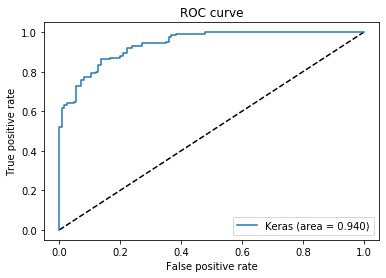

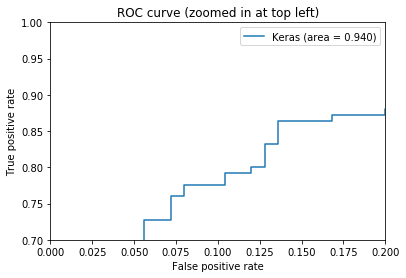

In [150]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprs[0], tprs[0], label='AlexNet (area = {:.3f})'.format(aucs[0]))
plt.plot(mlp_fprs[0], mlp_tprs[0], label='MLP (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.7, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprs[0], tprs[0], label='AlexNet (area = {:.3f})'.format(aucs[0]))
plt.plot(mlp_fprs[0], mlp_tprs[0], label='MLP (area = {:.3f})'.format(aucs[0]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [108]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_ohe[:,0], y_pred_keras[:,0])
tpr_keras

array([0.        , 0.02325581, 0.02325581, 0.04651163, 0.04651163,
       0.04651163, 0.06976744, 0.06976744, 0.09302326, 0.09302326,
       0.11627907, 0.11627907, 0.13953488, 0.13953488, 0.18604651,
       0.18604651, 0.25581395, 0.27906977, 0.30232558, 0.30232558,
       0.3255814 , 0.3255814 , 0.34883721, 0.34883721, 0.37209302,
       0.37209302, 0.60465116, 0.60465116, 0.62790698, 0.62790698,
       0.65116279, 0.65116279, 0.6744186 , 0.6744186 , 0.69767442,
       0.69767442, 0.72093023, 0.72093023, 0.74418605, 0.74418605,
       0.76744186, 0.76744186, 0.88372093, 0.88372093, 0.93023256,
       0.93023256, 1.        ])

In [135]:
#print(aucs, fprs, tprs)
print(len(fprs[3]))

52


In [32]:
old_histories["loss"]

In [47]:
old_histories[0].history

{'val_loss': [0.3086502356529236,
  0.3283050652742386,
  0.292212664604187,
  0.2826671036481857,
  0.23993148624897004,
  0.2301979398727417,
  0.2715948328971863,
  0.4862943035364151],
 'val_recall_6': [0.9039999842643738,
  0.8880000114440918,
  0.9200000166893005,
  0.871999979019165,
  0.8880000114440918,
  0.9039999842643738,
  0.8960000276565552,
  0.8640000224113464],
 'loss': [0.268541384109937,
  0.20544711815774755,
  0.19613678438893906,
  0.18069041215864842,
  0.17609683662239048,
  0.15704124928178156,
  0.14645729406746646,
  0.11541567897236543],
 'recall_6': [0.8964497,
  0.92228836,
  0.9276792,
  0.93180305,
  0.9381614,
  0.94183004,
  0.9490741,
  0.9566799]}

In [48]:
test = old_histories

In [49]:
test

In [51]:
with open("alexnet.txt", "w") as f:
    for history in test:
        print(history.history, file=f)

In [8]:
import ast
histories = []
max_length = 0
with open("alexnet.txt", "r") as f:
    line = f.readline()
    while line:
        histories.append(ast.literal_eval(line))
        line = f.readline()

In [18]:
histories[0]

{'val_loss': [0.3086502356529236,
  0.3283050652742386,
  0.292212664604187,
  0.2826671036481857,
  0.23993148624897004,
  0.2301979398727417,
  0.2715948328971863,
  0.4862943035364151],
 'val_recall_6': [0.9039999842643738,
  0.8880000114440918,
  0.9200000166893005,
  0.871999979019165,
  0.8880000114440918,
  0.9039999842643738,
  0.8960000276565552,
  0.8640000224113464],
 'loss': [0.268541384109937,
  0.20544711815774755,
  0.19613678438893906,
  0.18069041215864842,
  0.17609683662239048,
  0.15704124928178156,
  0.14645729406746646,
  0.11541567897236543],
 'recall_6': [0.8964497,
  0.92228836,
  0.9276792,
  0.93180305,
  0.9381614,
  0.94183004,
  0.9490741,
  0.9566799]}

In [39]:
#now lets get the average for each fold
#lets save the longest length item
import numpy as np
recalls = np.array([list(v for k,v in history.items() if k.startswith('recall')) for history in histories])

In [44]:
tmp = []
for recall in recalls:
    tmp.append(recall[0])

In [65]:
x=[[1,2],[1,2,3],[1]]
length = max(map(len, tmp))
recalls=np.array([xi+[None]*(length-len(xi)) for xi in tmp])
recalls = np.array(recalls)

In [66]:
means = []
for row in range(len(recalls[0])):
    sum = 0
    count = 0
    for item in recalls[:,row]:
        if item != None:
            count += 1
            sum += item
    means.append(sum/count)

In [67]:
means

[0.93794578,
 0.9468464320000001,
 0.955171754,
 0.9486528333333334,
 0.9474765666666666,
 0.950908455,
 0.9490741,
 0.9566799]